In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv(r'C:\Users\Sarthak Garg\spp.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


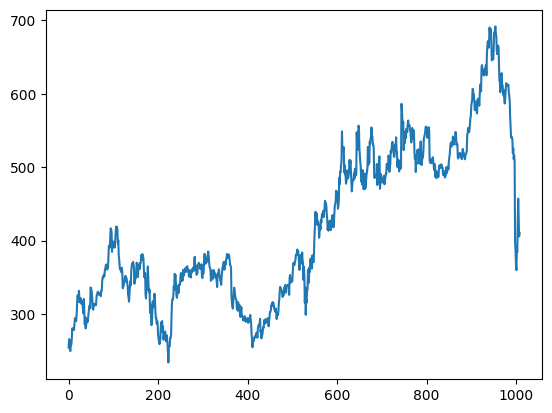

In [3]:
plt.plot(df.index , df['Close'])

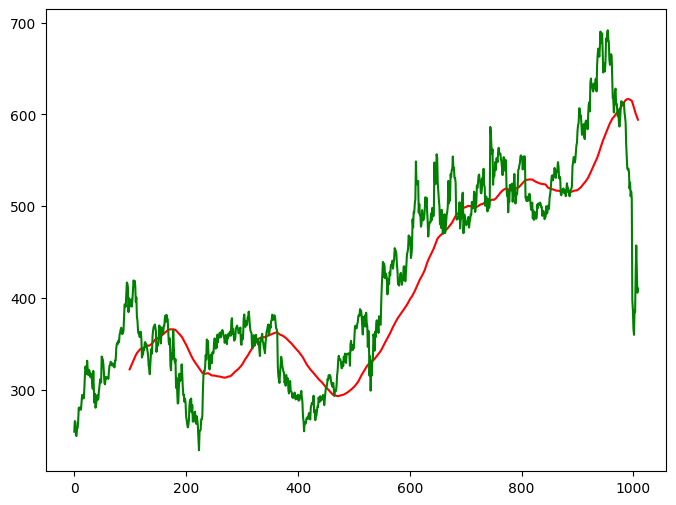

In [4]:
data_100_days = df.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(data_100_days, 'r')
plt.plot(df.Close, 'g')
plt.show()

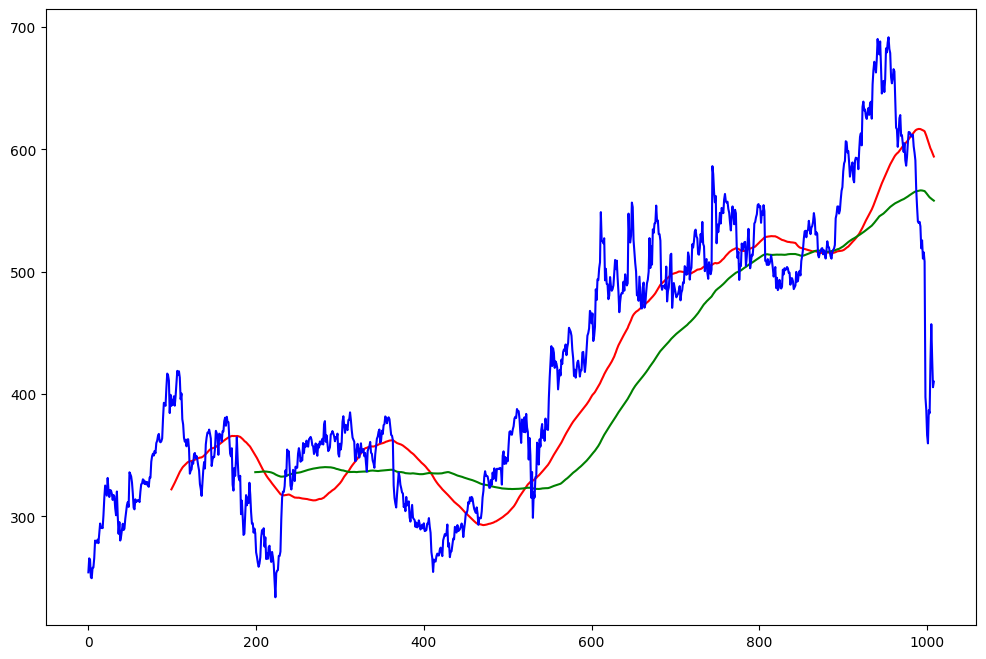

In [5]:
data_200_days = df.Close.rolling(200).mean()
plt.figure(figsize=(12,8))
plt.plot(data_100_days, 'r', )
plt.plot(data_200_days, 'g' , )
plt.plot(df.Close, 'b' )
plt.show()

In [6]:
df.shape

(1009, 7)

In [7]:
#split 

data_train = pd.DataFrame(df.Close[0: int(len(df)*0.70)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.70): len(df)])
data_train.shape


(706, 1)

In [8]:
data_test.shape

(303, 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
data_train_scaler = scaler.fit_transform(data_train)
x = []
y = []
for i in range(100, data_train_scaler.shape[0]):
    x.append(data_train_scaler[i-100:i])
    y.append(data_train_scaler[i,0])


In [11]:
x,y = np.array(x),  np.array(y)

In [12]:
from keras.layers import Dense, Dropout, LSTM # type: ignore
from keras.models import Sequential # type: ignore
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu' , return_sequences = True, 
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu' , return_sequences = True))
               
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

c:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x,y, epochs = 50 )

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 0.1437
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0239
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0172
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0165
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0183
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0120
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0127
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0129
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0151
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0141
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0118
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0090
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0123
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0099
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0114
Epo

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [16]:
past_100_days = data_train.tail(100)

In [17]:

final_test = pd.concat([past_100_days, data_test], ignore_index=True)
final_test.head()

,Close
0,476.890015
1,493.809998
2,493.160004
3,502.779999
4,507.760010


In [18]:
final_test

,Close
0,476.890015
1,493.809998
2,493.160004
3,502.779999
4,507.760010
...,...
398,427.140015
399,457.130005
400,429.480011
401,405.600006


In [19]:
data_test_scaler = scaler.fit_transform(final_test)
data_test_scaler

array([[0.35299258],
       [0.40395792],
       [0.40200005],
       [0.43097681],
       [0.4459773 ],
       [0.56938454],
       [0.49941261],
       [0.4975451 ],
       [0.49266545],
       [0.5051056 ],
       [0.40148794],
       [0.42986233],
       [0.39278291],
       [0.39193951],
       [0.35507087],
       [0.36371579],
       [0.40950024],
       [0.38799362],
       [0.3758547 ],
       [0.37983066],
       [0.3891081 ],
       [0.4184463 ],
       [0.45164013],
       [0.42895864],
       [0.44995325],
       [0.40672913],
       [0.37254133],
       [0.32299161],
       [0.3487153 ],
       [0.36636639],
       [0.3704328 ],
       [0.36943883],
       [0.39811436],
       [0.37600527],
       [0.41627756],
       [0.39943971],
       [0.38889723],
       [0.39422868],
       [0.56577012],
       [0.50173202],
       [0.49456311],
       [0.51164189],
       [0.59293949],
       [0.58176457],
       [0.50016565],
       [0.47094786],
       [0.44374825],
       [0.423

In [20]:
data_test_scaler.shape

(403, 1)

In [21]:

x_test = []
y_test = []
for i in range(100, data_test_scaler.shape[0]):
    x_test.append(data_test_scaler[i-100:i])
    y_test.append(data_test_scaler[i,0])

x_test,y_test = np.array(x_test),  np.array(y_test)    


In [22]:
print(x_test.shape)
print(y_test.shape)

(303, 100, 1)
(303,)


In [23]:
y_predict = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


In [24]:
y_predict

array([[0.367005  ],
       [0.36513075],
       [0.36368462],
       [0.36292595],
       [0.36336035],
       [0.36524945],
       [0.3693493 ],
       [0.37590367],
       [0.38421634],
       [0.3932541 ],
       [0.40299797],
       [0.41316342],
       [0.42204887],
       [0.42856604],
       [0.43231902],
       [0.43453228],
       [0.436272  ],
       [0.43850762],
       [0.44221666],
       [0.44789213],
       [0.45507833],
       [0.4628721 ],
       [0.4695736 ],
       [0.47390166],
       [0.4756113 ],
       [0.47573185],
       [0.4749819 ],
       [0.47489327],
       [0.47542006],
       [0.47603405],
       [0.4750146 ],
       [0.47172013],
       [0.46630087],
       [0.45868546],
       [0.4489071 ],
       [0.43807122],
       [0.42699614],
       [0.41619316],
       [0.40625808],
       [0.40207702],
       [0.40721527],
       [0.4221379 ],
       [0.44439778],
       [0.4707103 ],
       [0.49620816],
       [0.51767606],
       [0.53308165],
       [0.542

In [25]:
scaler.scale_

array([0.00301214])

In [26]:
scale = 1/scaler.scale_
y_predict = y_predict * scale
y_test = y_test * scale

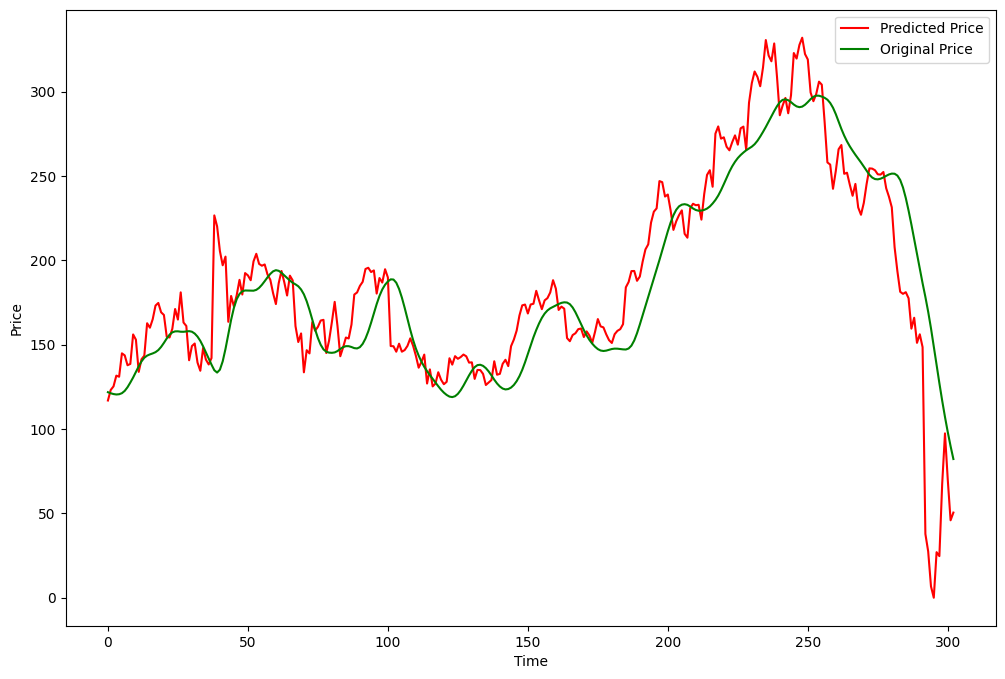

In [27]:
plt.figure(figsize=(12,8))
plt.plot(y_test, "r", label = 'Predicted Price')
plt.plot(y_predict,'g',label = 'Original Price')
plt.xlabel( 'Time' )
plt.ylabel( 'Price' )
plt.legend()
plt.show()

In [28]:
model.save('STOCK_FILE.keras')